In [1]:
# fine annotate lineage 
import scanpy as sc
import numpy as np
import pandas as pd
import scvi
import seaborn as sns
import os,sys
import anndata
import dandelion as ddl
import palantir
import warnings 
warnings.filterwarnings('ignore')
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/ImageSpot/')
import scvi_wrapper as s_w


Global seed set to 0
/nfs/team205/ny1/miniconda/miniconda3/envs/dandemilo-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [2]:
sc.logging.print_header()
import matplotlib.pyplot as plt
sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
# plt.rcParams["figure.figsize"] = [6,6]
# sns.set_palette('colorblind')

scanpy==1.9.3 anndata==0.9.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.4.4 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [3]:
%matplotlib inline

# Load VDJ large object

In [4]:
h5ad_file = '/nfs/team205/ny1/ThymusSpatialAtlas/Figure5/Thymus_Atlas_v17_CITE_abTCR.h5ad'
adata_tcr = sc.read_h5ad(h5ad_file)

In [273]:
h5ad_file = '/nfs/team205/ny1/ThymusSpatialAtlas/Figure5/Thymus_Atlas_v18_CITE.h5ad'
adata_full = sc.read_h5ad(h5ad_file)

In [142]:
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/Figure5/VDJ/')

In [274]:
adata_full.obs.anno_CITE_4v3.value_counts()

DP(Q)_rearr            27133
DP(P)_early            22834
DP_4hi8lo              12896
committed_CD4pos        6497
DP_pos_sel              6185
SP_CD4_semimature       5499
DP(Q)_CD199             5337
DP(Q)_early             4672
SP_CD8_semimature       4496
DP(Q)_CD99_CD31lo       4115
SP_CD4_immature         3991
committed_CD4neg        3846
DP_early_CD31           3021
DP(Q)_CD99_CD31hi       2927
SP_Treg_mature          2119
SP_CD8_immature         2032
SP_Treg_immature        1658
DP(Q)_HSPH1              979
CD8aaI_immature          827
SP_CD4_mature            714
CD8aaII_mature           712
CD8aaII_immature         646
SP_Treg_PD1              575
CD8aaI_mature            487
DP(P)_late               378
SP_CD8_mature            371
gdT_semimature           354
SP_Treg_CD8              353
committed_CD4neg(P)      335
NK_tr_itg_hi             192
gdT_immature             189
SP_Treg_recirc           168
uncommitted              163
iNKT                     149
committed_CD4p

In [275]:
adata_full = adata_full[adata_full.obs['annotation_level_0']=='T_lineage']
# adata_full = adata_full[adata_full.obs['anno_CITE_4v3']!='ambiguous']
# adata_full = adata_full[adata_full.obs['anno_CITE_4v3']!='unassigned']
adata_tcr = adata_tcr[adata_tcr.obs['annotation_level_0']=='T_lineage']
# adata_tcr = adata_tcr[adata_tcr.obs['anno_CITE_4v3']!='ambiguous']
# adata_tcr = adata_tcr[adata_tcr.obs['anno_CITE_4v3']!='unassigned']
adata_full

View of AnnData object with n_obs × n_vars = 127644 × 36751
    obs: 'n_genes', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_

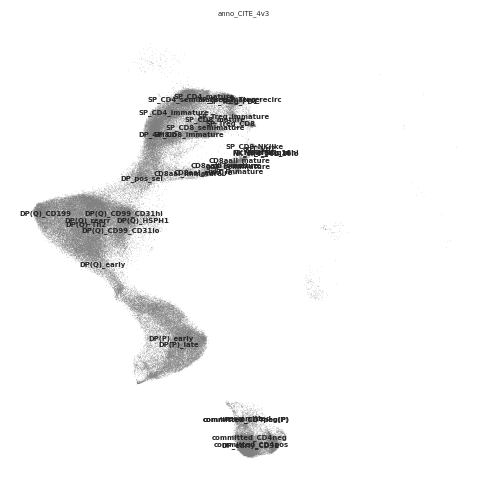

In [300]:
import warnings 
warnings.filterwarnings('ignore')
# import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
sc.set_figure_params(figsize=[6,6],fontsize=5,dpi=50,dpi_save=300)
anno = 'anno_CITE_4v3'
sc.pl.umap(adata_tcr, color = [anno], frameon = False, wspace = 0.6, cmap = 'jet',s=0.5,save='_'+anno+'.pdf',legend_loc='on data')
# anno = 'cite_CD99'
# sc.pl.umap(adata_full, color = [anno], layer='counts',frameon = False, wspace = 0.6, cmap = 'viridis',s=1,save='_'+anno+'.pdf',legend_loc='on data')
# sc.pl.umap(adata_full, color = [anno], frameon = False, wspace = 0.6, cmap = 'jet',s=1)
# adata_full.obs['anno_CITE_4v3'].value_counts().keys()

In [149]:
# set up subsets and colors
ct_order = ['uncommitted', 'committed_CD4neg','committed_CD4neg(P)','committed_CD4pos','committed_CD4pos(P)','DP_early_CD31']
# ct_order = ['uncommitted', 'committed_CD4neg',,'committed_CD4pos',',
#                 'DP(P)_early', 'DP(P)_late','DP(Q)_early','DP(Q)_rearr','DP(Q)_CD99_CD31lo','DP_early_CD31',
#                 'DP(Q)_CD199','DP(Q)_HSPH1','DP_pos_sel','DP(Q)_CD99_CD31hi','DP(Q)_Th2',]
# ct_order = ['T_DN(early)','T_DN(P)','T_DN(Q)','T_DP(P)','T_DP(Q)','T_SP_entry','T_CD4','T_CD8']
# ct_order = ['ETP','T_DN(early)','T_DN(P)-early','T_DN(P)','T_DN(Q)','T_DN(CD25)','T_DP(P)-1','T_DP(P)-2']
# ct_order = ['ETP','T_DN(early)','T_DN(P)-early','T_DN(P)','T_DN(Q)','T_DN(CD25)','T_DP(P)-1','T_DP(P)-2','T_DP(P)-3','T_DP(P)-4','T_DP(Q)','T_DP(Q)-HSPH1','T_DP(Q)-CD99','T_αβT(entry)','T_CD4','T_CD8','T_CD8-Prolif']
len(ct_order)

6

In [150]:
# ct_order = ['ETP','T_DN(early)','T_DN(P)-early','T_DN(P)','T_DN(Q)','T_DN(CD25)','T_DP(P)-1','T_DP(P)-2','T_DP(P)-3','T_DP(P)-4','T_DP(Q)','T_DP(Q)-HSPH1','T_DP(Q)-CD99','T_αβT(entry)','T_CD4','T_CD8','T_CD8-Prolif']
ct_color_map = dict(zip(ct_order, np.array(sns.color_palette("tab10", len(ct_order)))[range(len(ct_order))]))

In [183]:

# utility function to setup the data to only contain cells with VDJ info.
bdata = ddl.tl.setup_vdj_pseudobulk(adata_tcr, 
                                    mode='abT',
                                    subsetby='anno_CITE_4v3', 
                                    groups = ct_order, 
                                    productive_vdj=False, 
                                    productive_vj=False,
                                    check_vdj_mapping=None,
                                    check_vj_mapping=None,
                                   filter_pattern = None,
                                   allowed_chain_status=None)
bdata

AnnData object with n_obs × n_vars = 13998 × 36751
    obs: 'n_genes', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spli

In [184]:
# change all entries with ',' (inconfident mappings) to 'None'
for chain in ['v_call_abT_VDJ_main', 'j_call_abT_VDJ_main','v_call_abT_VJ_main', 'j_call_abT_VJ_main']:
    bdata.obs[chain] = bdata.obs[chain].astype('object')
    for cell in bdata.obs_names:
        gene = bdata.obs.loc[cell, chain]
        if ',' in gene or gene =='None' or gene =='No_contig':
            bdata.obs.loc[cell, chain] = chain+'_None'
    bdata.obs[chain] = bdata.obs[chain].astype('category')

# Select neighbourhoods 

In [69]:
## need to redo neighborhood graph after subsetting cells before milo
# n_neighbors decides the minimum neighbourhood size 
# # here use_rep = 'X_scvi' as data integration was done using scVI
# bdata = s_w.scvi_wrapper_basic(bdata,
#                        batch_key='sample',
#                        categorical_covariate_keys=['enrichment'],
#                        continuous_covariate_keys=['age_numeric'],
#                        cluster_leiden=False,
#                                hvg=3000)



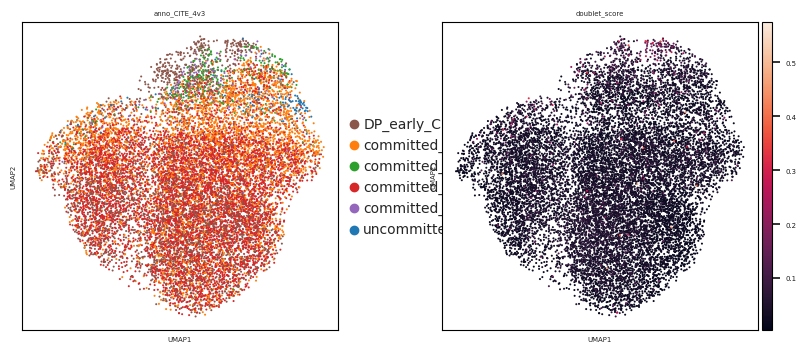

committed_CD4pos       6497
committed_CD4neg       3840
DP_early_CD31          3020
committed_CD4neg(P)     334
uncommitted             163
committed_CD4pos(P)     144
Name: anno_CITE_4v3, dtype: int64

In [301]:
# take a look at the UMAP to make sure it looks reasonable i.e. different cell types are clustered separately
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.umap(bdata, color=['anno_CITE_4v3','doublet_score'], palette = ct_color_map, legend_fontsize=10)
bdata.obs.anno_CITE_4v3.value_counts()

In [186]:
# # downsample source both by max count and cell type
# target_cells = 3000
# target_cells_subclass = 1000
# cluster_key = 'anno_CITE_4v3'
# adatas = [bdata[bdata.obs[cluster_key].isin([clust])] for clust in list(bdata.obs[cluster_key].cat.categories)]

# for dat in adatas:
#     if dat.n_obs > target_cells_subclass:
#         if np.unique(dat.obs[anno].isin([]))[0]:
#             sc.pp.subsample(dat, n_obs=target_cells_subclass)
#         else:
#             if dat.n_obs > target_cells:
#                 sc.pp.subsample(dat, n_obs=target_cells)

# bdata = adatas[0].concatenate(*adatas[1:])
# bdata.obs[anno].value_counts()

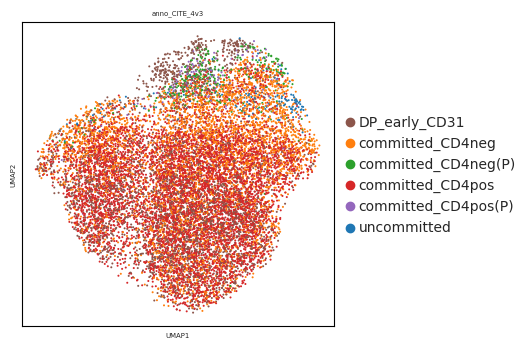

committed_CD4pos       6497
committed_CD4neg       3840
DP_early_CD31          3020
committed_CD4neg(P)     334
uncommitted             163
committed_CD4pos(P)     144
Name: anno_CITE_4v3, dtype: int64

In [302]:
sc.pp.neighbors(bdata, use_rep = "X_scVI", n_neighbors = 50)
sc.tl.umap(bdata, random_state = 1712)
# take a look at the UMAP to make sure it looks reasonable i.e. different cell types are clustered separately
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.umap(bdata, color=['anno_CITE_4v3'], palette = ct_color_map, legend_fontsize=10)
bdata.obs.anno_CITE_4v3.value_counts()

In [201]:
import milopy
import milopy.core as milo

# use milo to sample neighbourhood
milo.make_nhoods(bdata,prop=0.5)
# build neighbourhood adata in bdata.uns['nhood_adata']
milo.count_nhoods(bdata, sample_col='sample') # this step is needed to build bdata.uns['nhood_adata'] and sample_col can be anything
# this step is needed for plotting below
milopy.utils.build_nhood_graph(bdata)
# assign neighbourhood celltype by majority voting
# results are in bdata.uns['nhood_adata'].obs['nhood_annotation'] & bdata.uns['nhood_adata'].obs['nhood_annotation_frac'] 
milopy.utils.annotate_nhoods(bdata, anno_col='anno_CITE_4v3')


Text(0, 0.5, 'proportion (%) of neighborhoods')

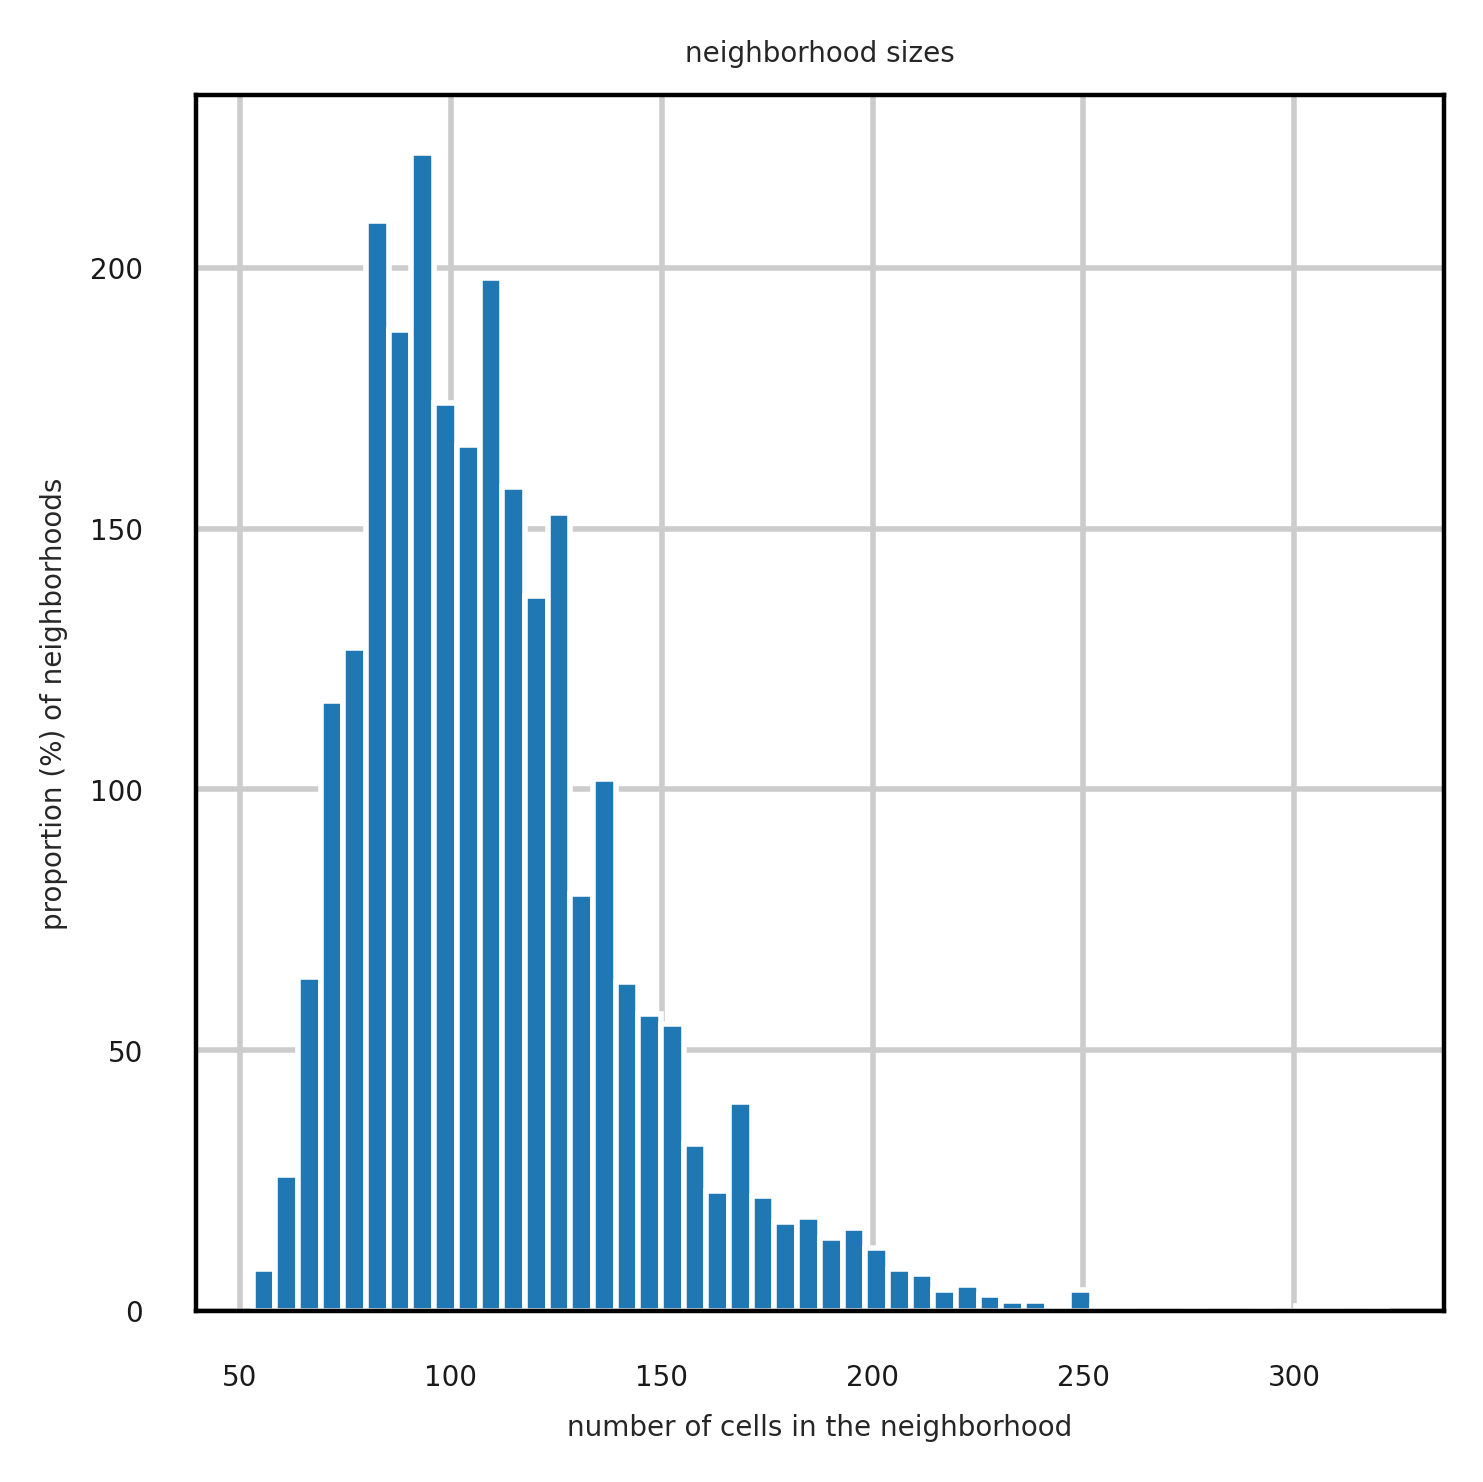

In [202]:
# histogram to look at neighbourhood sizes ### optional
plt.rcParams["figure.figsize"] = [4,4]
plt.hist(np.array(bdata.obsm["nhoods"].sum(0)).flatten(), bins=50);
plt.title('neighborhood sizes')
plt.xlabel('number of cells in the neighborhood')
plt.ylabel('proportion (%) of neighborhoods')
#plt.savefig(fig_path+'TCR_neighbourhood_size.pdf')

Now neighbourhood adata is stored in bdata.uns['nhood_adata']

In [203]:
bdata.uns['nhood_adata']

AnnData object with n_obs × n_vars = 2541 × 11
    obs: 'index_cell', 'kth_distance', 'Nhood_size', 'nhood_annotation', 'nhood_annotation_frac'
    uns: 'sample_col', 'nhood', 'annotation_labels', 'annotation_obs'
    obsm: 'X_milo_graph', 'frac_annotation'
    obsp: 'nhood_connectivities'

In [204]:
tmp = bdata.obs[['v_call_abT_VDJ_main', 'j_call_abT_VDJ_main','v_call_abT_VJ_main', 'j_call_abT_VJ_main']]

In [205]:
np.sum(tmp.isna())

v_call_abT_VDJ_main    0
j_call_abT_VDJ_main    0
v_call_abT_VJ_main     0
j_call_abT_VJ_main     0
dtype: int64

# Create neighbourhood VDJ feature space

In [206]:
from anndata import AnnData
from typing import List, Optional, Union
import scipy as sp
def _get_pbs(pbs, obs_to_bulk, adata):
    """
    Helper function to ensure we have a cells by pseudobulks matrix which we can use for
    pseudobulking. Uses the pbs and obs_to_bulk inputs to vdj_pseudobulk() and
    gex_pseudobulk().
    """
    # well, we need some way to pseudobulk
    if pbs is None and obs_to_bulk is None:
        raise ValueError(
            "You need to specify `pbs` or `obs_to_bulk` when calling the function"
        )

    # but just one
    if pbs is not None and obs_to_bulk is not None:
        raise ValueError("You need to specify `pbs` or `obs_to_bulk`, not both")

    # turn the pseubodulk matrix dense if need be
    if pbs is not None:
        if sp.sparse.issparse(pbs):
            pbs = pbs.todense()

    # get the obs-derived pseudobulk
    if obs_to_bulk is not None:
        if type(obs_to_bulk) is list:
            # this will create a single value by pasting all the columns together
            tobulk = adata.obs[obs_to_bulk].T.astype(str).agg(",".join)
        else:
            # we just have a single column
            tobulk = adata.obs[obs_to_bulk]
        # this pandas function creates the exact pseudobulk assignment we want
        # this needs to be different than the default uint8
        # as you can have more than 255 cells in a pseudobulk, it turns out
        pbs = pd.get_dummies(tobulk, dtype="uint16").values
    return pbs
def _get_pbs_obs(pbs, obs_to_take, adata):
    """
    Helper function to create the pseudobulk object's obs. Uses the pbs and obs_to_take
    inputs to vdj_pseudobulk() and gex_pseudobulk().
    """
    # prepare per-pseudobulk calls of specified metadata columns
    pbs_obs = pd.DataFrame(index=np.arange(pbs.shape[1]))
    if obs_to_take is not None:
        # just in case a single is passed as a string
        if type(obs_to_take) is not list:
            obs_to_take = [obs_to_take]
        # now we can iterate over this nicely
        # using the logic of milopy's annotate_nhoods()
        for anno_col in obs_to_take:
            anno_dummies = pd.get_dummies(adata.obs[anno_col])
            # this needs to be turned to a matrix so dimensions get broadcast correctly
            anno_count = np.asmatrix(pbs).T.dot(anno_dummies.values)
            anno_frac = np.array(anno_count / anno_count.sum(1))
            anno_frac = pd.DataFrame(
                anno_frac,
                index=np.arange(pbs.shape[1]),
                columns=anno_dummies.columns,
            )
            pbs_obs[anno_col] = anno_frac.idxmax(1)
            pbs_obs[anno_col + "_fraction"] = anno_frac.max(1)
    # report the number of cells for each pseudobulk
    # ensure pbs is an array so that it sums into a vector that can go in easily
    pbs_obs["cell_count"] = np.sum(np.asarray(pbs), axis=0)
    return pbs_obs

def vdj_pseudobulk(
    adata: AnnData,
    pbs: Optional[Union[np.ndarray, sp.sparse.csr_matrix]] = None,
    obs_to_bulk: Optional[Union[str, List[str]]] = None,
    obs_to_take: Optional[Union[str, List[str]]] = None,
    cols: Optional[List[str]] = None,
) -> AnnData:
    """Function for making pseudobulk vdj feature space. One of `pbs` or `obs_to_bulk`
    needs to be specified when calling.
    Parameters
    ----------
    adata : AnnData
        Cell adata, preferably after `ddl.tl.setup_vdj_pseudobulk()`
    pbs : Optional[Union[np.ndarray, sp.sparse.csr_matrix]], optional
        Optional binary matrix with cells as rows and pseudobulk groups as columns
    obs_to_bulk : Optional[Union[str, List[str]]], optional
        Optional obs column(s) to group pseudobulks into; if multiple are provided, they
        will be combined
    obs_to_take : Optional[Union[str, List[str]]], optional
        Optional obs column(s) to identify the most common value of for each pseudobulk.
    cols : Optional[List[str]], optional
        If provided, use the specified obs columns to extract V(D)J calls
    Returns
    -------
    AnnData
        pb_adata, whereby each observation is a pseudobulk:\n
        VDJ usage frequency stored in pb_adata.X\n
        VDJ genes stored in pb_adata.var\n
        pseudobulk metadata stored in pb_adata.obs\n
        pseudobulk assignment (binary matrix with input cells as columns) stored in pb_adata.obsm['pbs']\n
    """
    # get our cells by pseudobulks matrix
    pbs = _get_pbs(pbs, obs_to_bulk, adata)

    # if not specified by the user, use the following default dandelion VJ columns
    if cols is None:
        cols = [i for i in adata.obs if re.search("_VDJ_main|_VJ_main", i)]

    # perform matrix multiplication of pseudobulks by cells matrix by a cells by VJs matrix
    # start off by creating the cell by VJs matrix, using the pandas dummies again
    # skip the prefix stuff as the VJ genes will be unique in the columns
    vjs = pd.get_dummies(adata.obs[cols], prefix="", prefix_sep="")
    # TODO: DENAN SOMEHOW? AS IN NAN GENES?
    # can now multiply transposed pseudobulk assignments by this vjs thing, turn to df
    vj_pb_count = pbs.T.dot(vjs.values)
    df = pd.DataFrame(
        vj_pb_count, index=np.arange(pbs.shape[1]), columns=vjs.columns
    )

    # loop over V(D)J gene categories
    #for col in cols:
        # identify columns holding genes belonging to the category
        # and then normalise the values to 1 for each pseudobulk
        #mask = np.isin(df.columns, np.unique(adata.obs[col]))
        #df.loc[:, mask] = df.loc[:, mask].div(
            #df.loc[:, mask].sum(axis=1), axis=0
        #)

    # create obs for the new pseudobulk object
    pbs_obs = _get_pbs_obs(pbs, obs_to_take, adata)

    # store our feature space and derived metadata into an AnnData
    pb_adata = sc.AnnData(
        np.array(df), var=pd.DataFrame(index=df.columns), obs=pbs_obs
    )
    # store the pseudobulk assignments, as a sparse for storage efficiency
    # transpose as the original matrix is cells x pseudobulks
    pb_adata.obsm["pbs"] = sp.sparse.csr_matrix(pbs.T)
    return pb_adata

In [207]:
# function for making neighbourhood vdj feature space
nhood_adata = vdj_pseudobulk(bdata, pbs = bdata.obsm['nhoods'], obs_to_take = 'anno_CITE_4v3', cols=['v_call_abT_VDJ_main', 'j_call_abT_VDJ_main','v_call_abT_VJ_main', 'j_call_abT_VJ_main'])
nhood_adata

AnnData object with n_obs × n_vars = 2541 × 160
    obs: 'anno_CITE_4v3', 'anno_CITE_4v3_fraction', 'cell_count'
    obsm: 'pbs'

In [208]:
ncell = nhood_adata.shape[0]
nhood_size = nhood_adata.obs['cell_count']
cols=['v_call_abT_VDJ_main', 'j_call_abT_VDJ_main','v_call_abT_VJ_main', 'j_call_abT_VJ_main']
for col in cols:
    mask = np.isin(nhood_adata.var_names, np.unique(bdata.obs[col]))
    
    # normalise including None
    genes = nhood_adata.var_names[mask]
    df = pd.DataFrame(data = nhood_adata[:,genes].X.copy(), columns = genes)
    df = df / np.array(np.sum(df, axis=1)).reshape(ncell,1) # this is the same as /nhood_adata.obs['cell_count']

    # normalise excluding None 
    genes2 = [gene for gene in genes if gene != col+'_None']
    df2 = pd.DataFrame(data = nhood_adata[:,genes2].X.copy(), columns = genes2)
    df2 = df2 / np.array(np.sum(df2, axis=1)).reshape(ncell,1)
    # if expressing cell number < 10, then everything in df2 set to 0
    nhood_select = np.array(nhood_size) * np.array(1-df[col+'_None']) < 10
    df2.loc[nhood_select, :] = 0
    
    # combine dataframe and replace .X with normalised data
    df_combine = pd.concat([df2, df[col+'_None']], axis=1)
    nhood_adata[:,df_combine.columns].X = df_combine

In [209]:
# fill nan with 0 (as e.g. one neighborhood doesn't have any TRBV, then it would be nan for all TRBV genes, but 1 for v_call_abT_VDJ_main_None)
nhood_adata.X = np.nan_to_num(nhood_adata.X, copy=True, nan=0, posinf=None, neginf=None)

     nhood_adata is the new neighbourhood VDJ feature space, whereby each observation is a cell neighbourhood
     VDJ usage frequency stored in nhood_adata.X
     VDJ genes stored in nhood_adata.var
     neighbourhood metadata stored in nhood_adata.obs
     can visualise the data using PCA or UMAP (see below)

In [218]:
# # sort out the annotation colour order
ct_order_nhood = [value for value in ct_order if value in list(np.unique(nhood_adata.obs['anno_CITE_4v3']))]
ct_color_map_nhood = dict(zip(ct_order_nhood, np.array(sns.color_palette("tab10", len(ct_order_nhood)))[range(len(ct_order_nhood))]))
ct_order_nhood

['uncommitted',
 'committed_CD4neg',
 'committed_CD4neg(P)',
 'committed_CD4pos',
 'DP_early_CD31']

In [219]:
nhood_adata.obs['anno_CITE_4v3'] = nhood_adata.obs['anno_CITE_4v3'].astype('category')
nhood_adata.obs['anno_CITE_4v3'] = nhood_adata.obs['anno_CITE_4v3'].cat.reorder_categories(ct_order_nhood)

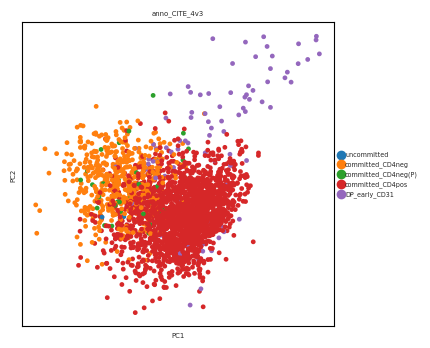

In [303]:
sc.pp.pca(nhood_adata, random_state = 1712)
sc.pl.pca(nhood_adata, color=['anno_CITE_4v3'], palette=ct_color_map_nhood)

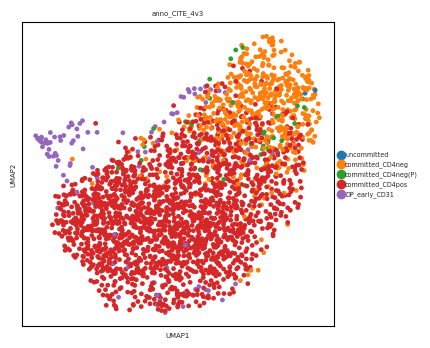

In [304]:
sc.pp.neighbors(nhood_adata, random_state = 1712)
sc.tl.umap(nhood_adata, random_state = 1712)
sc.pl.umap(nhood_adata, color=['anno_CITE_4v3'], palette=ct_color_map_nhood)

### Run Pseudotime on VDJ feature space

In [305]:
# make sure you install palantir if you don't already have it
# import palantir

# Run diffusion maps
pca_projections = pd.DataFrame(nhood_adata.obsm['X_pca'], index=nhood_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=10)

Determing nearest neighbor graph...


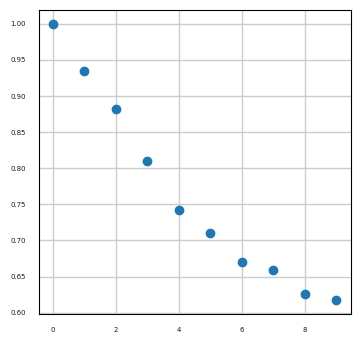

In [306]:
plt.scatter(np.arange(10), dm_res['EigenValues'])

In [225]:
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=4)

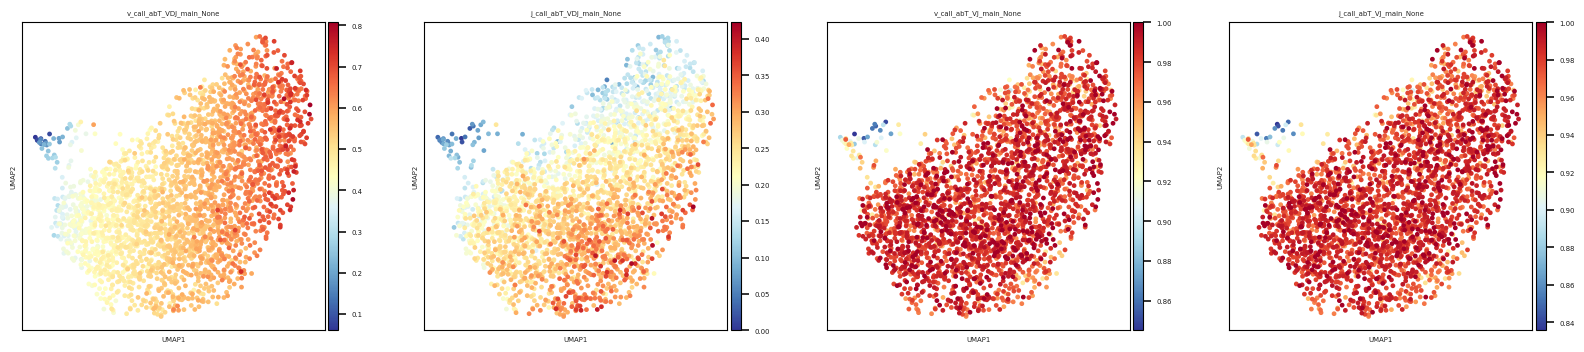

In [307]:
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.umap(nhood_adata, color=[col + '_None' for col in cols],color_map = 'RdYlBu_r')


In [227]:
# select the start and end points
# start
#tmp = nhood_adata[nhood_adata.obs['anno_lvl_2_final_clean'] == 'DP(P)_T']
tmp = nhood_adata[nhood_adata.obs['anno_CITE_4v3'] == 'uncommitted']
rootcell = np.argmax(tmp.obsm['X_umap'][:,1])
rootcell = tmp.obs_names[rootcell]
nhood_adata.obs['rootcell'] = 0
nhood_adata.obs.loc[rootcell,'rootcell'] = 1

In [243]:
# ends
end_anno = 'DP_early_CD31'
tmp1 = nhood_adata[nhood_adata.obs['anno_CITE_4v3'] == end_anno]
endcell1 = np.argmin(tmp1.obsm['X_umap'][1,:])
endcell1 = tmp1.obs_names[endcell1]

terminal_states = pd.Series([end_anno], index=[endcell1])

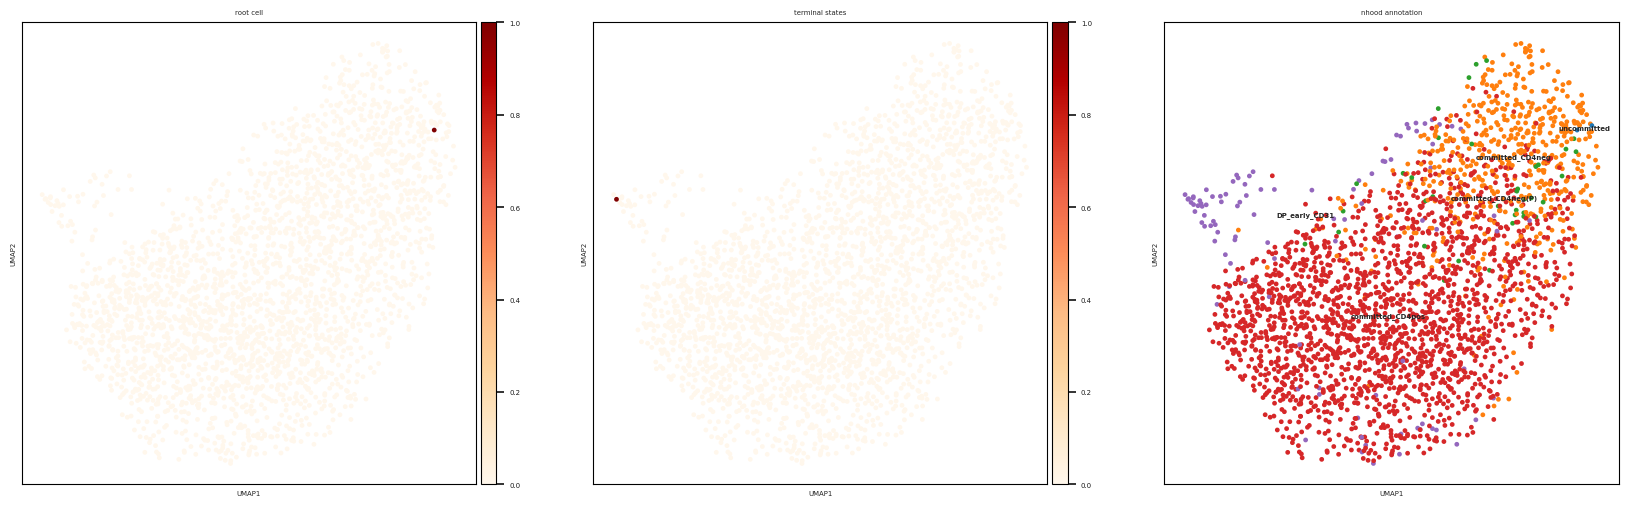

In [308]:
# plot rootcell and terminal states
nhood_adata.obs['terminal_states'] = 0
nhood_adata.obs.loc[terminal_states.index, 'terminal_states'] = 1
plt.rcParams["figure.figsize"] = [6,6]
sc.pl.umap(nhood_adata,color=['rootcell','terminal_states','anno_CITE_4v3'],
           title=['root cell','terminal states','nhood annotation'],color_map='OrRd',legend_loc='on data')

In [245]:
pr_res = palantir.core.run_palantir(ms_data,  rootcell, num_waypoints=500, 
                                    terminal_states = terminal_states.index)

Sampling and flocking waypoints...
Time for determining waypoints: 0.003742520014444987 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.02843344211578369 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9998
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [246]:
pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]

## Visualise the data

In [247]:
ddl.tl.pseudotime_transfer(adata = nhood_adata, pr_res = pr_res, suffix = '_nhood_vdj')
x = np.array(nhood_adata.obs['prob_'+end_anno + '_nhood_vdj'])
x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
nhood_adata.obs['prob_'+end_anno + '_nhood_vdj'] = x_norm

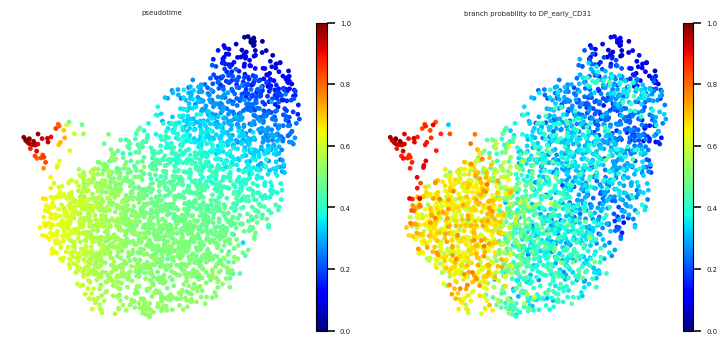

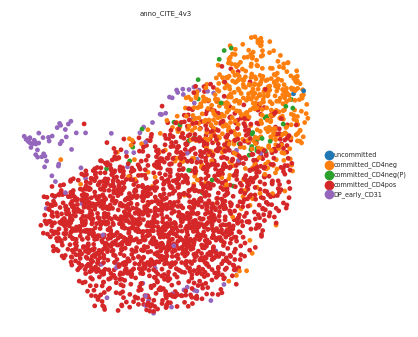

In [309]:
plt.rcParams["figure.figsize"] = [4,4]
plot = ['pseudotime', 'prob_'+end_anno]
sc.pl.umap(nhood_adata,color=[term + '_nhood_vdj' for term in plot],
           title=['pseudotime','branch probability to '+end_anno],
           frameon=False,wspace=0.1,
           color_map = 'jet'
          )
sc.pl.umap(nhood_adata,color=['anno_CITE_4v3'],frameon=False,)

## Project pseudotime and branch probabilities back to cells

In [250]:
nhood_adata

AnnData object with n_obs × n_vars = 2541 × 160
    obs: 'anno_CITE_4v3', 'anno_CITE_4v3_fraction', 'cell_count', 'rootcell', 'terminal_states', 'pseudotime_nhood_vdj', 'prob_DP_early_CD31_nhood_vdj'
    uns: 'pca', 'anno_CITE_4v3_colors', 'neighbors', 'umap'
    obsm: 'pbs', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [298]:
# project the nhood level pseudotime to cell level pseudotime.
cdata = ddl.tl.project_pseudotime_to_cell(adata = bdata, 
                               pb_adata = nhood_adata, 
                               term_states=[end_anno], 
                               suffix = '_nhood_vdj')

In [298]:
def project_nhood_annotations_to_cell(
    adata: AnnData, pb_adata: AnnData, term_states: List[str], suffix: str = ""
) -> AnnData:
    """Function to project general nnotations from pb_adata (pseudobulk adata) to adata (cell adata).

    Parameters
    ----------
    adata : AnnData
        Cell adata, preferably after `ddl.tl.setup_vdj_pseudobulk()`
    pb_adata : AnnData
        neighbourhood/pseudobulked adata
    term_states : List[str]
        list of terminal states with branch probabilities to be transferred
    suffix : str, optional
        suffix to be added after the added column names, default "" (none)

    Returns
    -------
    AnnData
        subset of adata whereby cells that don't belong to any neighbourhood are removed
        and projected pseudotime information stored in .obs - `pseudotime+suffix`, and `'prob_'+term_state+suffix` for each terminal state
    """
    # extract out cell x pseudobulk matrix. it's stored as pseudobulk x cell so transpose
    nhoods = np.array(pb_adata.obsm["pbs"].T.todense())

    # leave out cells that don't belong to any neighbourhood
    nhoodsum = np.sum(nhoods, axis=1)
    cdata = adata[nhoodsum > 0].copy()
    print(
        "number of cells removed due to not belonging to any neighbourhood",
        sum(nhoodsum == 0),
    )  # print how many cells removed
    # also subset the pseudobulk_assignments
    pb_assign_trim = nhoods[nhoodsum > 0]

    # for each cell pseudotime_mean is the average of the pseudotime of all pseudobulks the cell is in, weighted by 1/neighbourhood size
    nhoods_cdata = nhoods[nhoodsum > 0, :]
    nhoods_cdata_norm = nhoods_cdata / np.sum(
        nhoods_cdata, axis=0, keepdims=True
    )

    col_list = [
        "proj_" + state + suffix for state in term_states
    ]
    for col in col_list:
        cdata.obs[col] = (
            np.array(
                nhoods_cdata_norm.dot(pb_adata.obs[col]).T
                / np.sum(nhoods_cdata_norm, axis=1)
            )
            .flatten()
            .copy()
        )
    cdata.uns["pseudobulk_assignments"] = pb_assign_trim.copy()

    return cdata

number of cells removed due to not belonging to any neighbourhood 0


In [296]:
[col + '_None' for col in cols]

['v_call_abT_VDJ_main_None',
 'j_call_abT_VDJ_main_None',
 'v_call_abT_VJ_main_None',
 'j_call_abT_VJ_main_None']

In [252]:
ct_color_map

{'uncommitted': array([0.12156863, 0.46666667, 0.70588235]),
 'committed_CD4neg': array([1.        , 0.49803922, 0.05490196]),
 'committed_CD4neg(P)': array([0.17254902, 0.62745098, 0.17254902]),
 'committed_CD4pos': array([0.83921569, 0.15294118, 0.15686275]),
 'committed_CD4pos(P)': array([0.58039216, 0.40392157, 0.74117647]),
 'DP_early_CD31': array([0.54901961, 0.3372549 , 0.29411765])}

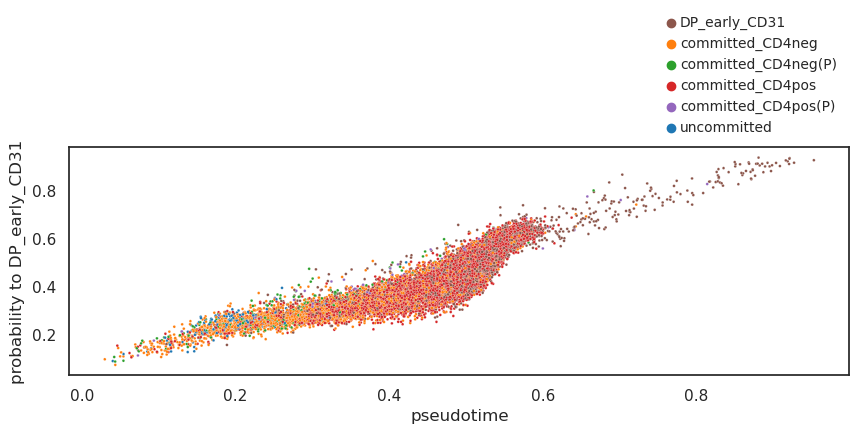

In [310]:
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(10,3))
df = cdata.obs.copy()
sigma = 0.05
df['prob_'+end_anno+'_nhood_vdj'] = df['prob_'+end_anno+'_nhood_vdj'] + (np.random.rand(len(df['prob_'+end_anno+'_nhood_vdj']))-0.5)*sigma
ax= sns.scatterplot(data=df, 
                    x ='pseudotime_nhood_vdj',
                    y='prob_'+end_anno+'_nhood_vdj',
                    s=4,
                    hue='anno_CITE_4v3',
                    palette = ct_color_map)
ax.set_ylabel('probability to '+end_anno)    
ax.set_xlabel('pseudotime')
ax.set_title('')
h,l = ax.get_legend_handles_labels()
l1 = ax.legend(h[:9],l[:], loc='lower right',bbox_to_anchor=(1, 1),frameon=False, fontsize='small')
#plt.savefig(fig_path+'pseudotime_scatterplot_nhood_vdj.pdf',bbox_inches='tight')

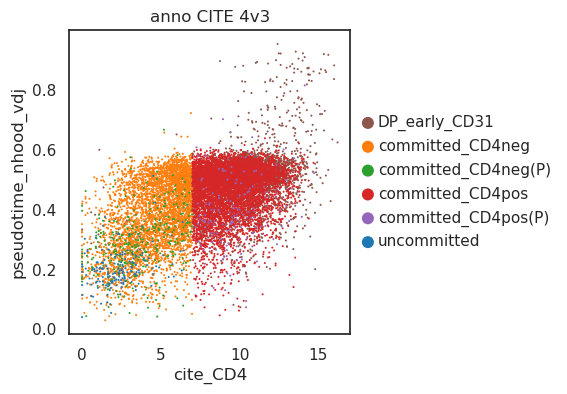

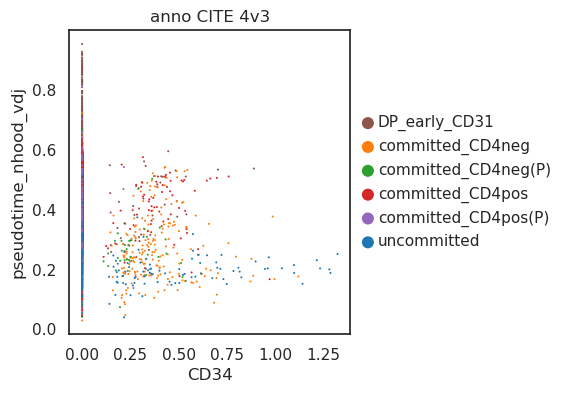

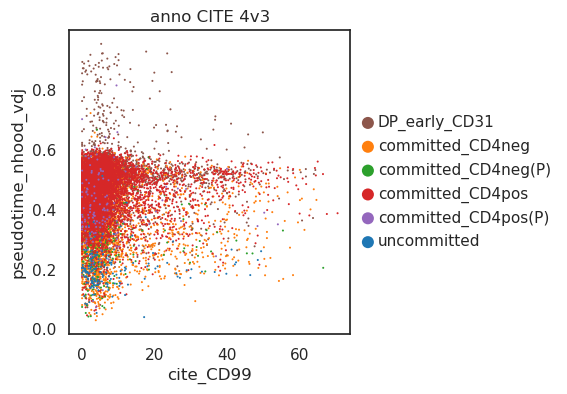

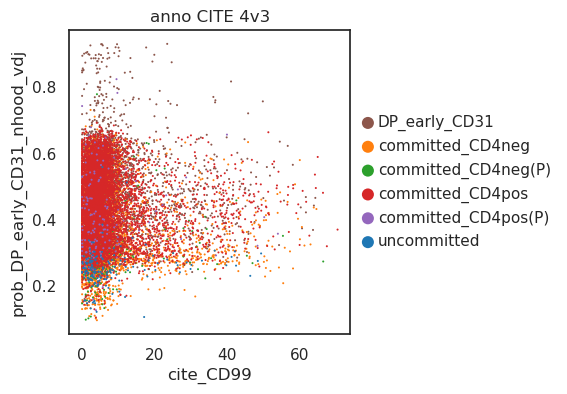

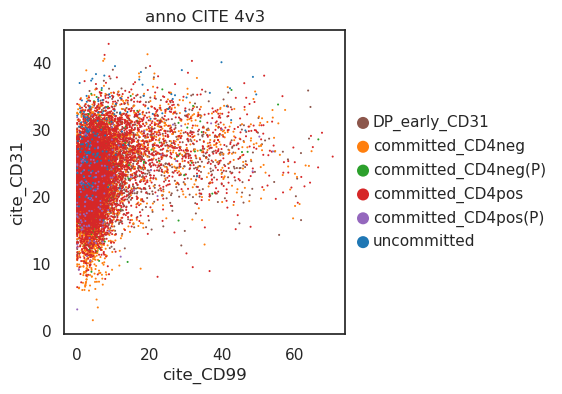

In [311]:
sc.pl.scatter(cdata,x='cite_CD4',y='pseudotime_nhood_vdj',color='anno_CITE_4v3',layers='counts')
sc.pl.scatter(cdata,x='CD34',y='pseudotime_nhood_vdj',color='anno_CITE_4v3')

sc.pl.scatter(cdata,x='cite_CD99',y='pseudotime_nhood_vdj',color='anno_CITE_4v3',layers='counts')
sc.pl.scatter(cdata,x='cite_CD99',y='prob_'+end_anno+'_nhood_vdj',color='anno_CITE_4v3',layers='counts')
sc.pl.scatter(cdata,x='cite_CD99',y='cite_CD31',color='anno_CITE_4v3',layers='counts')

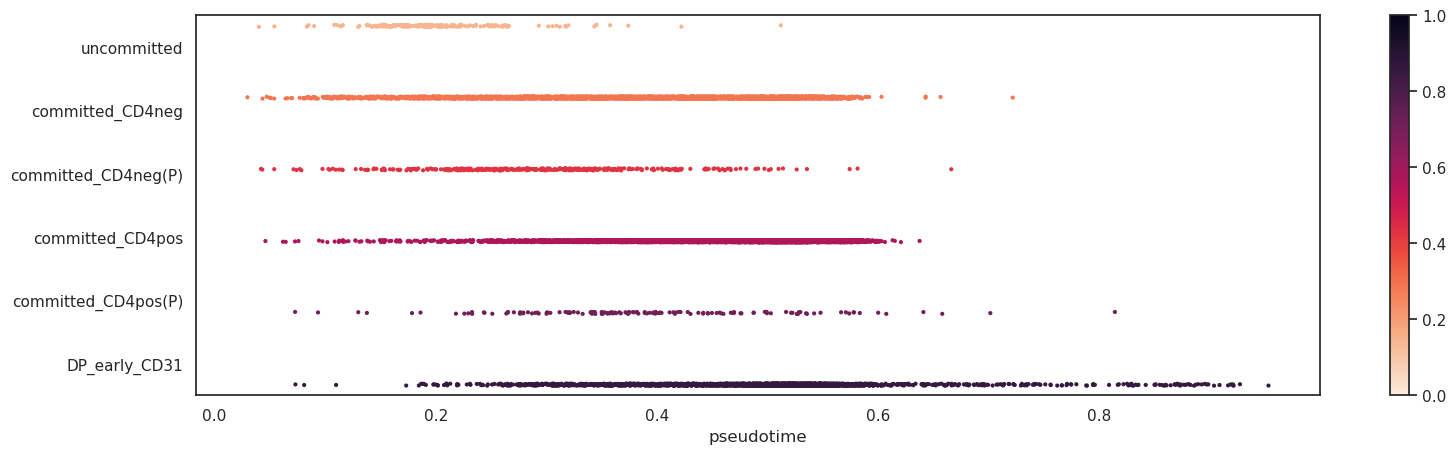

In [312]:
fig, ax = plt.subplots(figsize=(18,5))
# # sort out the annotation colour order
tmp_cdata = cdata[cdata.obs['anno_CITE_4v3'].isin(ct_order)] 
tmp_cdata.obs['anno_CITE_4v3'] = tmp_cdata.obs['anno_CITE_4v3'].astype('category')
tmp_cdata.obs['anno_CITE_4v3'] = tmp_cdata.obs['anno_CITE_4v3'].cat.reorder_categories(ct_order)
# plot color bar
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="rocket_r", norm=norm)
sm.set_array([])


ax=sns.stripplot(data=tmp_cdata.obs, x="pseudotime_nhood_vdj", hue='anno_CITE_4v3', y='anno_CITE_4v3',
                   palette='rocket_r',dodge=True, size=3)
ax.set_ylabel('')    
ax.set_xlabel('pseudotime')
ax.set_title('')
ax.get_legend().remove()
ax.figure.colorbar(sm)

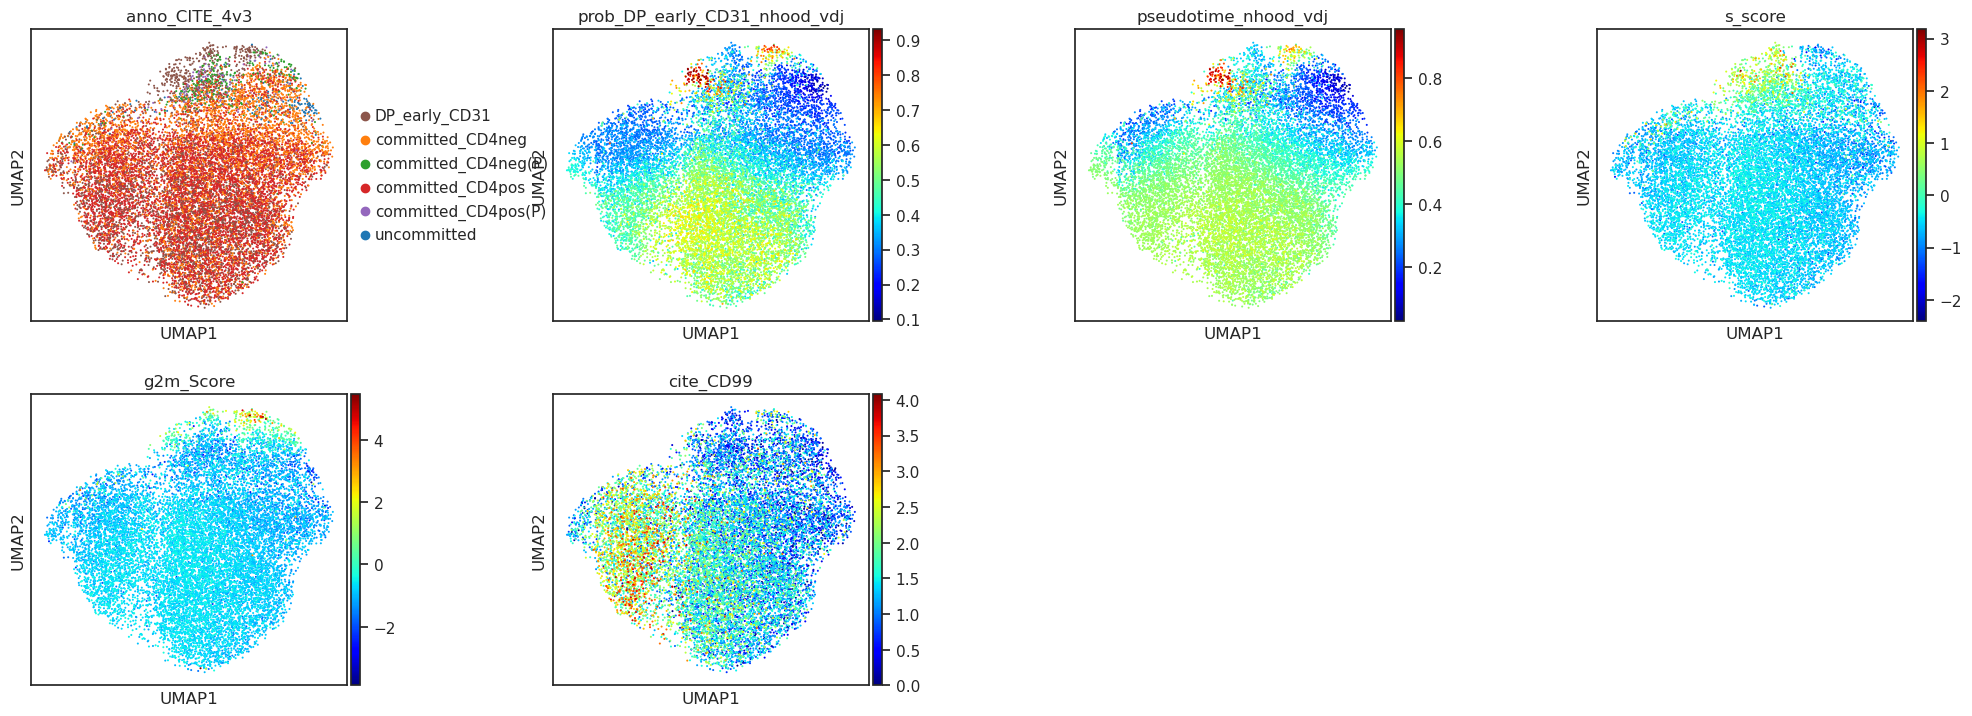

In [313]:
sc.pl.umap(cdata, color=['anno_CITE_4v3','prob_'+end_anno+'_nhood_vdj','pseudotime_nhood_vdj','s_score', 'g2m_Score','cite_CD99'],wspace=0.5, palette=ct_color_map,cmap='jet')

In [264]:
cdata

In [278]:
sc.pl.umap(adata_full, color=['anno_CITE_4v3','pseudotime_nhood_vdj'],wspace=1,cmap='jet')

In [285]:
adata_full_tmp = adata_full.copy()
adata_full_tmp.obs['pseudotime_nhood_vdj'] = (adata_full_tmp.obs['pseudotime_nhood_vdj']+1).combine_first(cdata.obs['pseudotime_nhood_vdj'])

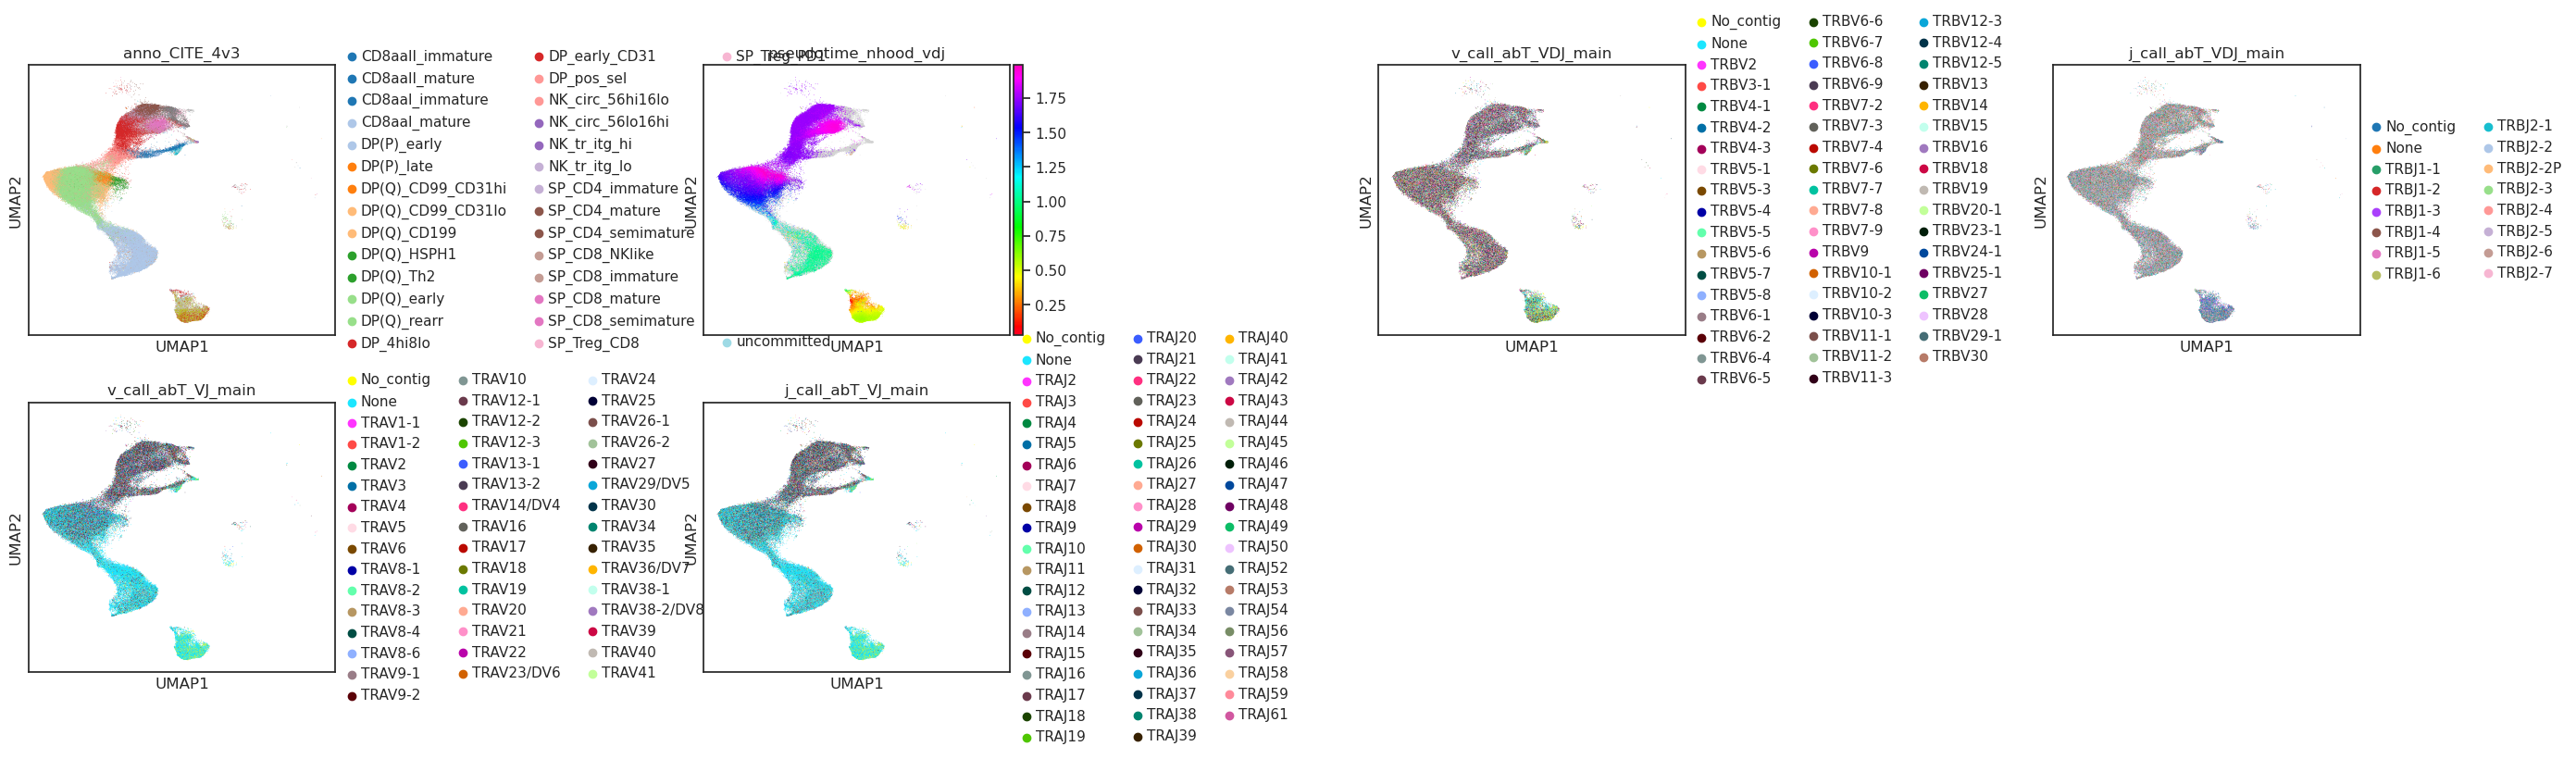

In [314]:
# adata_full_tmp.obs['pseudotime_nhood_vdj'] = cdata.obs['pseudotime_nhood_vdj']
sc.pl.umap(adata_full_tmp, color=['anno_CITE_4v3','pseudotime_nhood_vdj','v_call_abT_VDJ_main', 'j_call_abT_VDJ_main','v_call_abT_VJ_main', 'j_call_abT_VJ_main']
,wspace=1,cmap='gist_rainbow')

In [299]:
adata_full_tmp.write_h5ad('/nfs/team205/ny1/ThymusSpatialAtlas/Figure5/Thymus_Atlas_v19_CITE.h5ad')